In [6]:
import pandas as pd 
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import os 
import re # for Regular Expressions
import string
import time
from numpy import random
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Dense,Flatten,InputLayer,BatchNormalization,
                                     Dropout,Input,LayerNormalization)
from tensorflow.keras.losses import (BinaryCrossentropy,CategoricalCrossentropy,
                                    SparseCategoricalCrossentropy)
from tensorflow.keras.metrics import (Accuracy,TopKCategoricalAccuracy,
                                 CategoricalAccuracy, SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer)

In [7]:
LDS = pd.read_csv("ProcessedLabeledData.csv")
LDS = LDS.drop('Unnamed: 0', axis = 1)

In [8]:
LDS.head()

,class,tweet
0,2,woman shouldnt complain cleaning house man alw...
1,1,boy dat coldtyga dwn bad cuffin dat hoe 1st place
2,1,dawg ever fuck bitch start cry confused shit
3,1,look like tranny
4,1,shit hear might true might faker bitch told ya


In [5]:
LDS.tail()

,class,tweet
24978,0,starting sound like real faggot black monkey
24979,0,youre retard forcing onto people muslim kicked...
24980,0,saw vid vettel gay pride bike ukraine arm band...
24981,0,little faggot suck homo
24982,0,tranny storytime black monkey towelheads


In [5]:
import torch
BATCH_SIZE=8
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')


C:\Users\Shaun\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [7]:
from transformers import pipeline
 
# Downloading the sentiment analysis model
SentimentClassifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
C:\Users\Shaun\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Defining a function to call for the whole dataframe
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])
  return(SentimentClassifier(inpText)[0]['score'])

#BERT sentiment result function for every tweet
LDS['Sentiment']=LDS['tweet'].apply(FunctionBERTSentiment)
LDS.head(10)

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
LDS = pd.read_csv("ProcessedLabeledData.csv")
LDS = LDS.drop('Unnamed: 0', axis = 1)
LDS.head()

,class,tweet
0,2,woman shouldnt complain cleaning house man alw...
1,1,boy dat coldtyga dwn bad cuffin dat hoe 1st place
2,1,dawg ever fuck bitch start cry confused shit
3,1,look like tranny
4,1,shit hear might true might faker bitch told ya


In [11]:
LDS['tweet']= LDS['tweet'].astype(str)

In [16]:
# Combine tokens into strings (if needed)
#SAD['tweet'] = SAD['tweet'].apply(lambda x: ' '.join(x))

NameError: name 'SAD' is not defined

## Selected Sentiment (Final)

In [8]:
#Tweet sentiment model Using a pipeline
from transformers import pipeline
task='sentiment'
SentimentClassifierTweet = pipeline("text-classification", model=f"cardiffnlp/twitter-roberta-base-{task}")


C:\Users\Shaun\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
# Defining a function to call for the whole dataframe
def FunctionBERTSentimentTweet(inpText):
    result = SentimentClassifierTweet(inpText)[0]
    return result['label'], result['score']

# BERTTweet sentiment result function for every tweet
LDS[['Sentiment', 'Score']] = LDS['tweet'].apply(lambda x: pd.Series(FunctionBERTSentimentTweet(x)))

# Displaying the first 10 rows
LDS.head(10)

,class,tweet,Sentiment,Score
0,2,woman shouldnt complain cleaning house man alw...,LABEL_0,0.566340
1,1,boy dat coldtyga dwn bad cuffin dat hoe 1st place,LABEL_0,0.598608
2,1,dawg ever fuck bitch start cry confused shit,LABEL_0,0.974858
3,1,look like tranny,LABEL_0,0.673002
4,1,shit hear might true might faker bitch told ya,LABEL_0,0.695477
5,1,shit blow meclaim faithful somebody still fuck...,LABEL_0,0.973432
6,1,sit hate another bitch got much shit going,LABEL_0,0.977202
7,1,cause im tired big bitch coming u skinny girl,LABEL_0,0.877116
8,1,might get ya bitch back thats,LABEL_0,0.567085
9,1,hobby include fighting mariam bitch,LABEL_0,0.694879


<AxesSubplot:xlabel='Score', ylabel='Sentiment'>

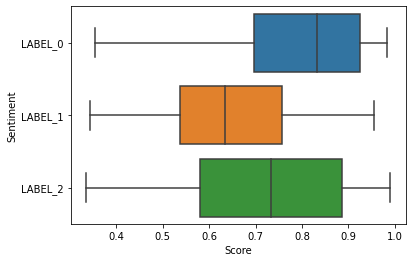

In [13]:
#Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive
sns.boxplot(x='Score', y='Sentiment', hue=None, data=LDS, whis=1.5, notch=False, ax=None)

In [19]:
LDS['Sentiment'].value_counts()

0    18198
1     5699
2     1086
Name: Sentiment, dtype: int64

In [20]:
LDS['Sentiment'].replace('LABEL_0', 'Negative', inplace=True) #Negative
LDS['Sentiment'].replace('LABEL_1', 'Neutral', inplace=True) #Neutral
LDS['Sentiment'].replace('LABEL_2', 'Positive', inplace=True) #Positive

In [21]:
LDS.to_csv('DataSentiment3class.csv')

## OLD Data

In [8]:
# Defining a function to call for the whole dataframe -OLD
def FunctionBERTSentimentTweet(inpText):
    result = SentimentClassifierTweet(inpText)[0]
    return result['label'], result['score']

# BERTTweet sentiment result function for every tweet
LDS[['Sentiment', 'Score']] = LDS['tweet'].apply(lambda x: pd.Series(FunctionBERTSentimentTweet(x)))

# Displaying the first 10 rows
LDS.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Sentiment,Score
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,LABEL_1,0.515808
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,LABEL_0,0.914856
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,LABEL_0,0.949416
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,LABEL_0,0.738627
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,LABEL_0,0.856830
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",LABEL_0,0.972528
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",LABEL_0,0.965972
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,LABEL_0,0.899182
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",LABEL_0,0.779194
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",LABEL_1,0.620812


<AxesSubplot:xlabel='Score', ylabel='Sentiment'>

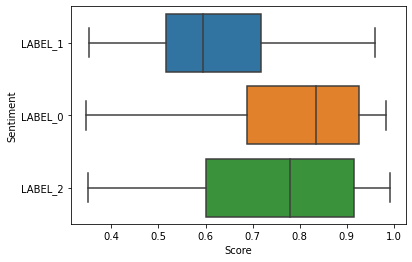

In [10]:
#Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive
sns.boxplot(x='Score', y='Sentiment', hue=None, data=LDS, whis=1.5, notch=False, ax=None)

In [14]:
LDS['Sentiment'].value_counts()

LABEL_0    18145
LABEL_1     5043
LABEL_2     1595
Name: Sentiment, dtype: int64

In [15]:
LDS1 = pd.read_csv("RawDataSentiment3class.csv")
LDS1 = LDS1.drop('Unnamed: 0', axis = 1)
LDS1['Sentiment'].value_counts()

NEU    19714
NEG     3012
POS     2057
Name: Sentiment, dtype: int64

In [ ]:
# replace '' with ''
LDS['Sentiment'].replace('LABEL_0', 0, inplace=True) #Negative
LDS['Sentiment'].replace('LABEL_1', 1, inplace=True) #Neutral
LDS['Sentiment'].replace('LABEL_2', 2, inplace=True) #Positive

In [18]:
LDS.head(150)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Sentiment,Score
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,LABEL_1,0.515808
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,LABEL_0,0.914856
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,LABEL_0,0.949416
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,LABEL_0,0.738627
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,LABEL_0,0.856830
...,...,...,...,...,...,...,...,...,...
145,147,3,0,3,0,1,"""@IScoutGirls: @verbally_abrupt bitch where u ...",LABEL_1,0.544137
146,148,3,0,3,0,1,"""@ItsYahBoiRay: @anelylove if I don't get my d...",LABEL_0,0.696880
147,149,3,0,2,1,1,"""@Itsyesie: #oomf is soooo cute. But he probab...",LABEL_2,0.488928
148,150,3,0,3,0,1,"""@JAYten9: In every cartoon theirs alway a @_n...",LABEL_0,0.479799


In [19]:
LDS.to_csv('RawDataSentiment3class.csv')